In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("dataset.csv")
df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


In [3]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   event_time     2633521 non-null  object 
 1   order_id       2633521 non-null  int64  
 2   product_id     2633521 non-null  int64  
 3   category_id    2201567 non-null  float64
 4   category_code  2021319 non-null  object 
 5   brand          2127516 non-null  object 
 6   price          2201567 non-null  float64
 7   user_id        564169 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 160.7+ MB


In [63]:
df["category_code"].value_counts()

electronics.smartphone              357682
appliances.kitchen.refrigerators     77386
16.18                                72969
electronics.video.tv                 71711
computers.notebook                   71436
                                     ...  
31.25                                    1
106.43                                   1
92.34                                    1
31.94                                    1
347.20                                   1
Name: category_code, Length: 510, dtype: int64

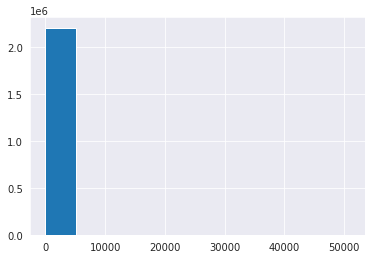

In [4]:
plt.hist(df["price"])
plt.show()

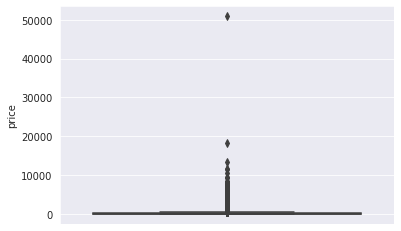

In [5]:
sns.boxplot(data=df,
            y="price")
plt.show()

In [6]:
df[df["price"] > 10000]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
28182,2020-06-25 10:08:37 UTC,2339244674033647628,1515966223509131884,2.374499e+18,electronics.video.tv,NaN,18328.68,1.515916e+18
28623,2020-06-26 09:10:44 UTC,2339940319191106553,1515966223509566954,2.374499e+18,electronics.video.tv,NaN,13310.16,1.515916e+18
1144303,2020-05-26 08:12:38 UTC,2353234364520727464,1515966223509105016,2.374499e+18,electronics.video.tv,samsung,50925.90,NaN
1153319,2020-05-27 06:37:30 UTC,2353235498996073224,2273948305316643078,2.268105e+18,electronics.video.tv,lg,11574.05,NaN
1627981,2020-07-03 11:59:01 UTC,2353288509000777918,2273948305316643078,2.268105e+18,electronics.video.tv,lg,11574.05,1.515916e+18
2270999,2020-09-16 06:46:10 UTC,2388440981134484484,1515966223520801280,2.374499e+18,electronics.video.tv,samsung,10416.64,1.515916e+18


In [7]:
df["price"].describe()

count    2.201567e+06
mean     1.540932e+02
std      2.419421e+02
min      0.000000e+00
25%      1.456000e+01
50%      5.553000e+01
75%      1.967400e+02
max      5.092590e+04
Name: price, dtype: float64

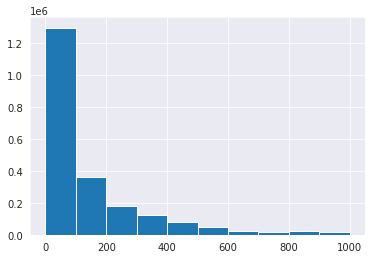

In [8]:
new_df = df[df["price"] < 1000]
plt.hist(new_df["price"])
plt.show()

In [82]:
# convert event_time to datetime
df["event_time"] = pd.to_datetime(df["event_time"], format="%Y-%m-%d %H:%M:%S %Z")
df["event_time"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2633521 entries, 0 to 2633520
Series name: event_time
Non-Null Count    Dtype              
--------------    -----              
2633521 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 20.1 MB


In [99]:
df["time_hours"] = df["event_time"].apply(lambda dt: dt.hour)
df["weekday"] = df["event_time"].apply(lambda dt: dt.weekday())

df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,time_hours,weekday
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,11,4
1,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,11,4
2,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,14,4
3,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,14,4
4,2020-04-24 19:16:21+00:00,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,19,4


In [65]:
top5 = df.groupby(["brand"], dropna=True)["price"].agg("sum").sort_values(ascending=False)[:5]
top5

brand
samsung    90052821.66
apple      47914786.00
lg         26156031.14
bosch      11077479.77
huawei     10773965.41
Name: price, dtype: float64

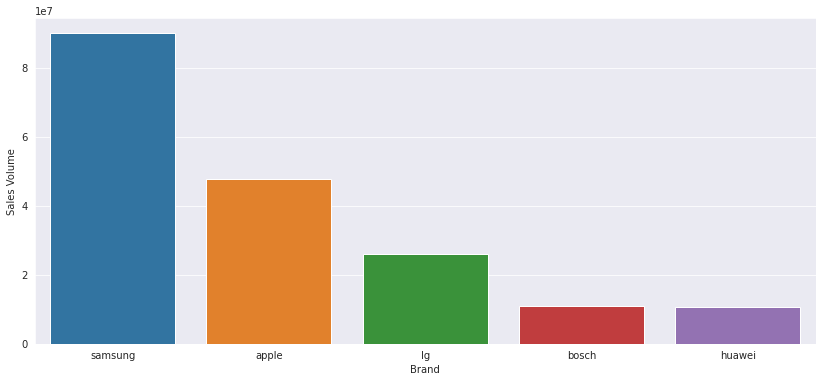

In [62]:
plt.figure(figsize=(14, 6))

sns.barplot(x=top5.index,
            y=top5.values)

plt.xlabel("Brand")
plt.ylabel("Sales Volume")
plt.show()

In [68]:
df.groupby("category_code")["price"].agg("mean").sort_values(ascending=False)[:5]

category_code
electronics.camera.video         620.713450
electronics.camera.photo         504.926867
construction.tools.heater        503.302107
appliances.kitchen.dishwasher    489.100339
computers.notebook               438.919187
Name: price, dtype: float64

In [78]:
trun_df = df[df["price"] < 20]
trun_df.groupby(["brand", "category_code"])["price"].agg("count").sort_values(ascending=False)[:5]

brand     category_code              
camelion  stationery.battery             14154
ava       appliances.personal.scales     10485
genius    computers.peripherals.mouse     9401
ava       appliances.kitchen.kettle       9171
awax      electronics.smartphone          8577
Name: price, dtype: int64

In [112]:
def plot_volume(df):
    volume = df.groupby("weekday")["price"].agg("sum")

    plt.figure(figsize=(14, 6))
    sns.barplot(x=volume.index,
                y=volume.values)

    plt.xlabel("Weekday")
    plt.ylabel("Sale Volume")
    plt.title("Distribution of Sales Volume Over Weekdays", fontweight="bold")

    plt.show()

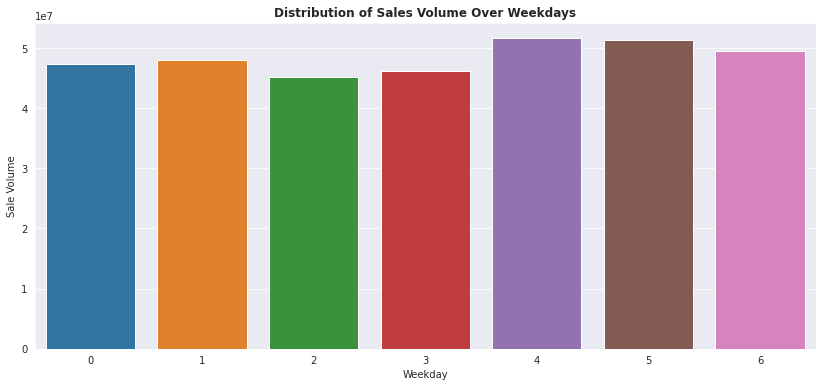

In [113]:
plot_volume(df)

In [125]:
def calculate_total_cost(x, y):
    years = df["event_time"].apply(lambda dt: dt.year)
    result = df[(years == y) & (df["category_code"] == x)]["price"].sum()

    return round(result, 2)

In [126]:
calculate_total_cost("electronics.tablet", 2020)

5386653.26

In [139]:
def calculate_probability(x, y):
    trun_df = df[df["brand"] == x]
    result = (trun_df["price"] > y).sum() / trun_df.shape[0]

    return round(result, 2)

In [141]:
calculate_probability("samsung", 50)

0.88